In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80.

In this notebook the environmental parameters has been modified for the .raw files and the TS spectra were manually check for only a single deep null in the 200 kHz

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [2]:
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

# 200 kHz calibration

In [3]:
EKcal_200_38 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_38_CalibrationDataFile-D20220616-T092948.xml', xpath=".//CalibrationResults")
EKcal_200_22 = pd.read_xml('F:/Nya-AZKABAN/Calibrations/200kHz/editCT_22_CalibrationDataFile-D20220615-T164530.xml', xpath=".//CalibrationResults")

EK_200_38_f = np.fromstring(EKcal_200_38.Frequency[0], dtype=float, sep=';')
EK_200_38_g = np.fromstring(EKcal_200_38.Gain[0], dtype=float, sep=';')
EK_200_38_mn_bw = np.fromstring(EKcal_200_38.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_38_mj_bw = np.fromstring(EKcal_200_38.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_38_mn_ao = np.fromstring(EKcal_200_38.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_38_mj_ao = np.fromstring(EKcal_200_38.AngleOffsetAthwartship[0], dtype=float, sep=';')

EK_200_22_f = np.fromstring(EKcal_200_22.Frequency[0], dtype=float, sep=';')
EK_200_22_g = np.fromstring(EKcal_200_22.Gain[0], dtype=float, sep=';')
EK_200_22_mn_bw = np.fromstring(EKcal_200_22.BeamWidthAlongship[0], dtype=float, sep=';')
EK_200_22_mj_bw = np.fromstring(EKcal_200_22.BeamWidthAthwartship[0], dtype=float, sep=';')
EK_200_22_mn_ao = np.fromstring(EKcal_200_22.AngleOffsetAlongship[0], dtype=float, sep=';')
EK_200_22_mj_ao = np.fromstring(EKcal_200_22.AngleOffsetAthwartship[0], dtype=float, sep=';')

Text(0.5, 0, 'Frequency (Hz)')

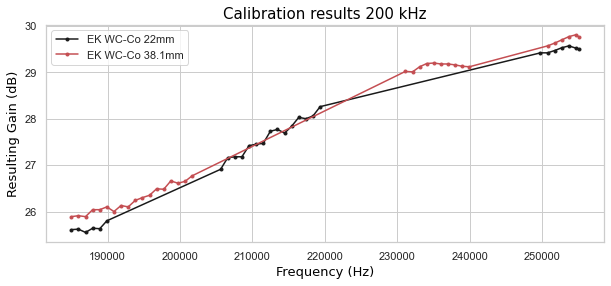

In [4]:
plt.figure(figsize=(10,4))

plt.plot(EK_200_22_f,EK_200_22_g, 'k.-',label='EK WC-Co 22mm')
plt.plot(EK_200_38_f,EK_200_38_g, 'r.-', label='EK WC-Co 38.1mm')
plt.legend()
plt.title('Calibration results 200 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

Spheres agreement is acceptable odd

### Let's take a deeper look and compare calibrated TS to theoretical TS


# Assess 200 kHz calibration

### Theoretical response

In [5]:
# sphere_ts : Gavin Macaulay's https://github.com/gavinmacaulay/SphereTS/blob/master/sphere_ts.py
f_start = 185000
f_stop = 255000 #Hz
a = 0.022 #m

sp = 35 #PSU
t = 0 #degC
p = 3 #m or dbar
# Get water properties
c, rho = sphere_ts.water_properties(sp, t, p)

# Get material properties of Tungsten carbide
mat_prop = sphere_ts.material_properties()
WC_Co = mat_prop['Tungsten carbide']

# Doesn't quite work...
freq_22, ts_22 =sphere_ts.freq_response(f_start, f_stop, a, 1446.56, WC_Co['c1'], WC_Co['c2'], rho, 1950)

In [6]:
c


1449.0552021335316

In [7]:
# theoretical 22 mm from EK80
ts_22 = [-44.93,-44.94,-44.95,-44.97,-44.98,-44.99,-45.00,-45.01,-45.03,-45.04,-45.05,-45.06,-45.07,-45.09,-45.10,-45.11,-45.12,-45.13,-45.14,-45.15,-45.17,-45.18,-45.19,-45.20,-45.21,-45.22,-45.23,-45.24,-45.25,-45.26,-45.27,-45.29,-45.30,-45.31,-45.32,-45.33,-45.34,-45.35,-45.35,-45.36,-45.37,-45.38,-45.39,-45.40,-45.41,-45.42,-45.43,-45.44,-45.44,-45.45,-45.46,-45.47,-45.48,-45.48,-45.49,-45.50,-45.50,-45.51,-45.52,-45.52,-45.53,-45.54,-45.54,-45.55,-45.56,-45.56,-45.57,-45.57,-45.58,-45.58,-45.59,-45.59,-45.59,-45.60,-45.60,-45.61,-45.61,-45.61,-45.62,-45.62,-45.62,-45.62,-45.63,-45.63,-45.63,-45.63,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.62,-45.62,-45.62,-45.62,-45.61,-45.61,-45.61,-45.60,-45.60,-45.60,-45.59,-45.59,-45.59,-45.58,-45.58,-45.58,-45.57,-45.57,-45.56,-45.56,-45.56,-45.55,-45.55,-45.54,-45.54,-45.54,-45.53,-45.53,-45.52,-45.52,-45.52,-45.51,-45.51,-45.50,-45.50,-45.50,-45.49,-45.49,-45.49,-45.48,-45.48,-45.48,-45.47,-45.47,-45.47,-45.46,-45.46,-45.46,-45.46,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.45,-45.46,-45.46,-45.46,-45.47,-45.47,-45.48,-45.48,-45.49,-45.50,-45.50,-45.51,-45.52,-45.53,-45.55,-45.56,-45.58,-45.59,-45.61,-45.63,-45.65,-45.68,-45.70,-45.73,-45.76,-45.80,-45.84,-45.88,-45.93,-45.98,-46.04,-46.10,-46.17,-46.25,-46.34,-46.44,-46.56,-46.69,-46.83,-47.00,-47.18,-47.38,-47.60,-47.81,-48.00,-48.10,-48.03,-47.67,-46.98,-46.02,-44.99,-44.07,-43.40,-42.96,-42.73,-42.63,-42.61,-42.64,-42.70,-42.77,-42.84,-42.92,-42.99,-43.06,-43.12,-43.18,-43.24,-43.29,-43.34,-43.38,-43.42,-43.46,-43.50,-43.53,-43.56,-43.59,-43.62,-43.65,-43.67,-43.69,-43.72,-43.74,-43.76,-43.78,-43.79,-43.81,-43.83,-43.84,-43.86,-43.87,-43.89,-43.90,-43.92,-43.93,-43.94,-43.95,-43.97,-43.98,-43.99,-44.00,-44.01,-44.02,-44.04,-44.05,-44.06,-44.07,-44.08,-44.09,-44.10,-44.11,-44.12,-44.13,-44.14,-44.15,-44.16,-44.17,-44.18,-44.19,-44.20,-44.21,-44.22,-44.23,-44.24,-44.25,-44.25,-44.26,-44.27,-44.28,-44.29,-44.30,-44.31,-44.32,-44.33,-44.34,-44.35,-44.36,-44.37,-44.38,-44.40,-44.41,-44.42,-44.43,-44.44,-44.45,-44.46,-44.47,-44.48,-44.49,-44.50,-44.51,-44.52,-44.53,-44.54,-44.56,-44.57,-44.58,-44.59,-44.60,-44.61,-44.62,-44.63,-44.64,-44.66,-44.67,-44.68,-44.69,-44.70,-44.71,-44.73,-44.74,-44.75,-44.76,-44.77,-44.78,-44.80,-44.81,-44.82,-44.83,-44.84,-44.86,-44.87,-44.88,-44.89,-44.90,-44.92,-44.93,-44.94,-44.95,-44.96,-44.98,-44.99,-45.00,-45.01,-45.02,-45.04,-45.05,-45.06,-45.07,-45.08,-45.09,-45.11,-45.12,-45.13,-45.14,-45.15,-45.16,-45.18,-45.19,-45.20,-45.21,-45.22,-45.23,-45.24,-45.26,-45.27,-45.28,-45.29,-45.30,-45.31,-45.32,-45.33,-45.34,-45.35,-45.36,-45.37,-45.38,-45.39,-45.41,-45.42,-45.42,-45.43,-45.44,-45.45,-45.46,-45.47,-45.48,-45.49,-45.50,-45.51,-45.52,-45.53,-45.54,-45.54,-45.55,-45.56,-45.57,-45.58,-45.58,-45.59,-45.60,-45.61,-45.61,-45.62,-45.63,-45.63,-45.64,-45.65,-45.65,-45.66,-45.67,-45.67,-45.68,-45.68,-45.69,-45.69,-45.70,-45.70,-45.71,-45.71,-45.72,-45.72,-45.73,-45.73,-45.74,-45.74,-45.74,-45.75,-45.75,-45.75,-45.76,-45.76,-45.76,-45.76,-45.77,-45.77,-45.77,-45.77,-45.77,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.79,-45.79,-45.79,-45.79,-45.79,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.78,-45.77,-45.77,-45.77,-45.77,-45.77,-45.77,-45.76,-45.76,-45.76,-45.76,-45.76,-45.75,-45.75,-45.75,-45.75,-45.74,-45.74,-45.74,-45.74,-45.73,-45.73,-45.73,-45.72,-45.72,-45.72,-45.72,-45.71,-45.71,-45.71,-45.70,-45.70,-45.70,-45.70,-45.69,-45.69,-45.69,-45.68,-45.68,-45.68,-45.68,-45.67,-45.67,-45.67,-45.67,-45.66,-45.66,-45.66,-45.66,-45.65,-45.65,-45.65,-45.65,-45.65,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.63,-45.64,-45.64,-45.64,-45.64,-45.64,-45.64,-45.65,-45.65,-45.65,-45.66,-45.66,-45.66,-45.67,-45.67,-45.67,-45.68,-45.68,-45.69,-45.69,-45.70,-45.71,-45.71,-45.72,-45.73,-45.73,-45.74,-45.75,-45.76,-45.76,-45.77,-45.78,-45.79,-45.80,-45.81,-45.82,-45.83,-45.85,-45.86,-45.87,-45.88,-45.90,-45.91,-45.92,-45.94,-45.95,-45.97,-45.99,-46.00,-46.02,-46.04,-46.06,-46.08,-46.10,-46.12,-46.14,-46.16,-46.18,-46.21,-46.23,-46.25,-46.28,-46.31,-46.33,-46.36,-46.39,-46.42,-46.45,-46.48,-46.52,-46.55,-46.59,-46.62,-46.66,-46.70,-46.74,-46.78,-46.83,-46.87,-46.92,-46.97,-47.02,-47.07,-47.12,-47.18,-47.24,-47.30,-47.36,-47.42,-47.49,-47.56,-47.63,-47.71,-47.79,-47.87,-47.96,-48.05,-48.14,-48.24,-48.34,-48.45,-48.56,-48.68,-48.80,-48.93,-49.06,-49.21,-49.36,-49.52,-49.69,-49.86,-50.05,-50.25,-50.46,-50.68,-50.92,-51.18,-51.45,-51.74,-52.05,-52.38,-52.74,-53.13,-53.55,-54.00,-54.49,-55.03,-55.62,-56.25,-56.95,-57.72,-58.55,-59.44,-60.38,-61.31,-62.16,-62.77,-62.97,-62.68,-61.95,-60.95,-59.85,-58.73,-57.66,-56.65,-55.71,-54.84,-54.04,-53.31,-52.63,-52.00,-51.42,-50.88,-50.39,-49.93,-49.50,-49.11,-48.75,-48.41,-48.10,-47.81,-47.54,-47.30,-47.07,-46.86,-46.67,-46.49,-46.32,-46.17,-46.03,-45.90,-45.78,-45.67,-45.57,-45.47,-45.39,-45.31,-45.24,-45.17,-45.11,-45.06,-45.01,-44.96,-44.92,-44.88,-44.84,-44.81,-44.78,-44.76,-44.73,-44.71,-44.69,-44.68,-44.66,-44.65,-44.63,-44.62,-44.61,-44.61,-44.60,-44.59,-44.59,-44.59,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.58,-44.59,-44.59,-44.59,-44.60,-44.60,-44.60,-44.61,-44.61,-44.62,-44.62,-44.63,-44.63,-44.64,-44.64,-44.65,-44.65,-44.66,-44.67,-44.67,-44.68,-44.68,-44.69,-44.69,-44.70,-44.70,-44.71,-44.72,-44.72,-44.73,-44.73,-44.74,-44.74,-44.74,-44.75,-44.75,-44.75,-44.76,-44.76,-44.76,-44.77,-44.77,-44.77,-44.77,-44.77,-44.77,-44.77,-44.76,-44.76,-44.76,-44.75,-44.75,-44.74,-44.73,-44.73,-44.72,-44.70,-44.69,-44.68,-44.66,-44.65,-44.63,-44.61,-44.59,-44.56,-44.54,-44.51,-44.48,-44.45,-44.42,-44.39,-44.35,-44.32,-44.28,-44.24,-44.20,-44.16,-44.12,-44.08,-44.03,-43.99,-43.95,-43.91,-43.87,-43.83,-43.79,-43.76,-43.72,-43.69,-43.66,-43.63,-43.60,-43.57,-43.55,-43.53,-43.51,-43.49,-43.47,-43.46,-43.44,-43.43,-43.42,-43.41,-43.40,-43.39,-43.39,-43.38,-43.38,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.37,-43.38,-43.38,-43.38,-43.38,-43.38,-43.39,-43.39,-43.39,-43.39,-43.40,-43.40,-43.40,-43.41,-43.41,-43.41,-43.41,-43.42,-43.42,-43.42,-43.42,-43.43,-43.43,-43.43,-43.43,-43.44,-43.44,-43.44,-43.44,-43.44,-43.45,-43.45,-43.45,-43.45,-43.45,-43.46,-43.46,-43.46,-43.46,-43.46,-43.47,-43.47,-43.47,-43.47,-43.47,-43.48,-43.48,-43.48,-43.48,-43.48,-43.48,-43.49,-43.49,-43.49,-43.49,-43.49,-43.50,-43.50,-43.50,-43.50,-43.50,-43.51,-43.51,-43.51,-43.51,-43.51,-43.52,-43.52,-43.52,-43.52,-43.53,-43.53,-43.53,-43.53,-43.54,-43.54,-43.54,-43.54,-43.55,-43.55,-43.55,-43.56,-43.56,-43.56,-43.57,-43.57,-43.57,-43.57,-43.58,-43.58,-43.59,-43.59,-43.59,-43.60,-43.60,-43.60,-43.61,-43.61,-43.62,-43.62,-43.62,-43.63,-43.63,-43.64,-43.64,-43.65,-43.65,-43.66]
freq_22 = [185000,185070,185140,185210,185280,185350,185420,185490,185560,185630,185700,185770,185840,185910,185980,186051,186121,186191,186261,186331,186401,186471,186541,186611,186681,186751,186821,186891,186961,187032,187102,187172,187242,187312,187382,187452,187522,187592,187662,187732,187802,187872,187942,188013,188083,188153,188223,188293,188363,188433,188503,188573,188643,188713,188783,188853,188923,188993,189064,189134,189204,189274,189344,189414,189484,189554,189624,189694,189764,189834,189904,189974,190045,190115,190185,190255,190325,190395,190465,190535,190605,190675,190745,190815,190885,190955,191026,191096,191166,191236,191306,191376,191446,191516,191586,191656,191726,191796,191866,191936,192007,192077,192147,192217,192287,192357,192427,192497,192567,192637,192707,192777,192847,192917,192987,193058,193128,193198,193268,193338,193408,193478,193548,193618,193688,193758,193828,193898,193968,194039,194109,194179,194249,194319,194389,194459,194529,194599,194669,194739,194809,194879,194949,195020,195090,195160,195230,195300,195370,195440,195510,195580,195650,195720,195790,195860,195930,196001,196071,196141,196211,196281,196351,196421,196491,196561,196631,196701,196771,196841,196911,196981,197052,197122,197192,197262,197332,197402,197472,197542,197612,197682,197752,197822,197892,197962,198033,198103,198173,198243,198313,198383,198453,198523,198593,198663,198733,198803,198873,198943,199014,199084,199154,199224,199294,199364,199434,199504,199574,199644,199714,199784,199854,199924,199994,200065,200135,200205,200275,200345,200415,200485,200555,200625,200695,200765,200835,200905,200975,201046,201116,201186,201256,201326,201396,201466,201536,201606,201676,201746,201816,201886,201956,202027,202097,202167,202237,202307,202377,202447,202517,202587,202657,202727,202797,202867,202937,203008,203078,203148,203218,203288,203358,203428,203498,203568,203638,203708,203778,203848,203918,203988,204059,204129,204199,204269,204339,204409,204479,204549,204619,204689,204759,204829,204899,204969,205040,205110,205180,205250,205320,205390,205460,205530,205600,205670,205740,205810,205880,205950,206021,206091,206161,206231,206301,206371,206441,206511,206581,206651,206721,206791,206861,206931,207002,207072,207142,207212,207282,207352,207422,207492,207562,207632,207702,207772,207842,207912,207982,208053,208123,208193,208263,208333,208403,208473,208543,208613,208683,208753,208823,208893,208963,209034,209104,209174,209244,209314,209384,209454,209524,209594,209664,209734,209804,209874,209944,210015,210085,210155,210225,210295,210365,210435,210505,210575,210645,210715,210785,210855,210925,210995,211066,211136,211206,211276,211346,211416,211486,211556,211626,211696,211766,211836,211906,211976,212047,212117,212187,212257,212327,212397,212467,212537,212607,212677,212747,212817,212887,212957,213028,213098,213168,213238,213308,213378,213448,213518,213588,213658,213728,213798,213868,213938,214009,214079,214149,214219,214289,214359,214429,214499,214569,214639,214709,214779,214849,214919,214989,215060,215130,215200,215270,215340,215410,215480,215550,215620,215690,215760,215830,215900,215970,216041,216111,216181,216251,216321,216391,216461,216531,216601,216671,216741,216811,216881,216951,217022,217092,217162,217232,217302,217372,217442,217512,217582,217652,217722,217792,217862,217932,218003,218073,218143,218213,218283,218353,218423,218493,218563,218633,218703,218773,218843,218913,218983,219054,219124,219194,219264,219334,219404,219474,219544,219614,219684,219754,219824,219894,219964,220035,220105,220175,220245,220315,220385,220455,220525,220595,220665,220735,220805,220875,220945,221016,221086,221156,221226,221296,221366,221436,221506,221576,221646,221716,221786,221856,221926,221996,222067,222137,222207,222277,222347,222417,222487,222557,222627,222697,222767,222837,222907,222977,223048,223118,223188,223258,223328,223398,223468,223538,223608,223678,223748,223818,223888,223958,224029,224099,224169,224239,224309,224379,224449,224519,224589,224659,224729,224799,224869,224939,225010,225080,225150,225220,225290,225360,225430,225500,225570,225640,225710,225780,225850,225920,225990,226061,226131,226201,226271,226341,226411,226481,226551,226621,226691,226761,226831,226901,226971,227042,227112,227182,227252,227322,227392,227462,227532,227602,227672,227742,227812,227882,227952,228023,228093,228163,228233,228303,228373,228443,228513,228583,228653,228723,228793,228863,228933,229004,229074,229144,229214,229284,229354,229424,229494,229564,229634,229704,229774,229844,229914,229984,230055,230125,230195,230265,230335,230405,230475,230545,230615,230685,230755,230825,230895,230965,231036,231106,231176,231246,231316,231386,231456,231526,231596,231666,231736,231806,231876,231946,232017,232087,232157,232227,232297,232367,232437,232507,232577,232647,232717,232787,232857,232927,232997,233068,233138,233208,233278,233348,233418,233488,233558,233628,233698,233768,233838,233908,233978,234049,234119,234189,234259,234329,234399,234469,234539,234609,234679,234749,234819,234889,234959,235030,235100,235170,235240,235310,235380,235450,235520,235590,235660,235730,235800,235870,235940,236011,236081,236151,236221,236291,236361,236431,236501,236571,236641,236711,236781,236851,236921,236991,237062,237132,237202,237272,237342,237412,237482,237552,237622,237692,237762,237832,237902,237972,238043,238113,238183,238253,238323,238393,238463,238533,238603,238673,238743,238813,238883,238953,239024,239094,239164,239234,239304,239374,239444,239514,239584,239654,239724,239794,239864,239934,240005,240075,240145,240215,240285,240355,240425,240495,240565,240635,240705,240775,240845,240915,240985,241056,241126,241196,241266,241336,241406,241476,241546,241616,241686,241756,241826,241896,241966,242037,242107,242177,242247,242317,242387,242457,242527,242597,242667,242737,242807,242877,242947,243018,243088,243158,243228,243298,243368,243438,243508,243578,243648,243718,243788,243858,243928,243998,244069,244139,244209,244279,244349,244419,244489,244559,244629,244699,244769,244839,244909,244979,245050,245120,245190,245260,245330,245400,245470,245540,245610,245680,245750,245820,245890,245960,246031,246101,246171,246241,246311,246381,246451,246521,246591,246661,246731,246801,246871,246941,247012,247082,247152,247222,247292,247362,247432,247502,247572,247642,247712,247782,247852,247922,247992,248063,248133,248203,248273,248343,248413,248483,248553,248623,248693,248763,248833,248903,248973,249044,249114,249184,249254,249324,249394,249464,249534,249604,249674,249744,249814,249884,249954,250025,250095,250165,250235,250305,250375,250445,250515,250585,250655,250725,250795,250865,250935,251006,251076,251146,251216,251286,251356,251426,251496,251566,251636,251706,251776,251846,251916,251986,252057,252127,252197,252267,252337,252407,252477,252547,252617,252687,252757,252827,252897,252967,253038,253108,253178,253248,253318,253388,253458,253528,253598,253668,253738,253808,253878,253948,254019,254089,254159,254229,254299,254369,254439,254509,254579,254649,254719,254789,254859,254929,255000]

In [8]:
## theoretical 38 mm from EK80
freq_38 = [185000,185070,185140,185210,185280,185350,185420,185490,185560,185630,185700,185770,185840,185910,185980,186051,186121,186191,186261,186331,186401,186471,186541,186611,186681,186751,186821,186891,186961,187032,187102,187172,187242,187312,187382,187452,187522,187592,187662,187732,187802,187872,187942,188013,188083,188153,188223,188293,188363,188433,188503,188573,188643,188713,188783,188853,188923,188993,189064,189134,189204,189274,189344,189414,189484,189554,189624,189694,189764,189834,189904,189974,190045,190115,190185,190255,190325,190395,190465,190535,190605,190675,190745,190815,190885,190955,191026,191096,191166,191236,191306,191376,191446,191516,191586,191656,191726,191796,191866,191936,192007,192077,192147,192217,192287,192357,192427,192497,192567,192637,192707,192777,192847,192917,192987,193058,193128,193198,193268,193338,193408,193478,193548,193618,193688,193758,193828,193898,193968,194039,194109,194179,194249,194319,194389,194459,194529,194599,194669,194739,194809,194879,194949,195020,195090,195160,195230,195300,195370,195440,195510,195580,195650,195720,195790,195860,195930,196001,196071,196141,196211,196281,196351,196421,196491,196561,196631,196701,196771,196841,196911,196981,197052,197122,197192,197262,197332,197402,197472,197542,197612,197682,197752,197822,197892,197962,198033,198103,198173,198243,198313,198383,198453,198523,198593,198663,198733,198803,198873,198943,199014,199084,199154,199224,199294,199364,199434,199504,199574,199644,199714,199784,199854,199924,199994,200065,200135,200205,200275,200345,200415,200485,200555,200625,200695,200765,200835,200905,200975,201046,201116,201186,201256,201326,201396,201466,201536,201606,201676,201746,201816,201886,201956,202027,202097,202167,202237,202307,202377,202447,202517,202587,202657,202727,202797,202867,202937,203008,203078,203148,203218,203288,203358,203428,203498,203568,203638,203708,203778,203848,203918,203988,204059,204129,204199,204269,204339,204409,204479,204549,204619,204689,204759,204829,204899,204969,205040,205110,205180,205250,205320,205390,205460,205530,205600,205670,205740,205810,205880,205950,206021,206091,206161,206231,206301,206371,206441,206511,206581,206651,206721,206791,206861,206931,207002,207072,207142,207212,207282,207352,207422,207492,207562,207632,207702,207772,207842,207912,207982,208053,208123,208193,208263,208333,208403,208473,208543,208613,208683,208753,208823,208893,208963,209034,209104,209174,209244,209314,209384,209454,209524,209594,209664,209734,209804,209874,209944,210015,210085,210155,210225,210295,210365,210435,210505,210575,210645,210715,210785,210855,210925,210995,211066,211136,211206,211276,211346,211416,211486,211556,211626,211696,211766,211836,211906,211976,212047,212117,212187,212257,212327,212397,212467,212537,212607,212677,212747,212817,212887,212957,213028,213098,213168,213238,213308,213378,213448,213518,213588,213658,213728,213798,213868,213938,214009,214079,214149,214219,214289,214359,214429,214499,214569,214639,214709,214779,214849,214919,214989,215060,215130,215200,215270,215340,215410,215480,215550,215620,215690,215760,215830,215900,215970,216041,216111,216181,216251,216321,216391,216461,216531,216601,216671,216741,216811,216881,216951,217022,217092,217162,217232,217302,217372,217442,217512,217582,217652,217722,217792,217862,217932,218003,218073,218143,218213,218283,218353,218423,218493,218563,218633,218703,218773,218843,218913,218983,219054,219124,219194,219264,219334,219404,219474,219544,219614,219684,219754,219824,219894,219964,220035,220105,220175,220245,220315,220385,220455,220525,220595,220665,220735,220805,220875,220945,221016,221086,221156,221226,221296,221366,221436,221506,221576,221646,221716,221786,221856,221926,221996,222067,222137,222207,222277,222347,222417,222487,222557,222627,222697,222767,222837,222907,222977,223048,223118,223188,223258,223328,223398,223468,223538,223608,223678,223748,223818,223888,223958,224029,224099,224169,224239,224309,224379,224449,224519,224589,224659,224729,224799,224869,224939,225010,225080,225150,225220,225290,225360,225430,225500,225570,225640,225710,225780,225850,225920,225990,226061,226131,226201,226271,226341,226411,226481,226551,226621,226691,226761,226831,226901,226971,227042,227112,227182,227252,227322,227392,227462,227532,227602,227672,227742,227812,227882,227952,228023,228093,228163,228233,228303,228373,228443,228513,228583,228653,228723,228793,228863,228933,229004,229074,229144,229214,229284,229354,229424,229494,229564,229634,229704,229774,229844,229914,229984,230055,230125,230195,230265,230335,230405,230475,230545,230615,230685,230755,230825,230895,230965,231036,231106,231176,231246,231316,231386,231456,231526,231596,231666,231736,231806,231876,231946,232017,232087,232157,232227,232297,232367,232437,232507,232577,232647,232717,232787,232857,232927,232997,233068,233138,233208,233278,233348,233418,233488,233558,233628,233698,233768,233838,233908,233978,234049,234119,234189,234259,234329,234399,234469,234539,234609,234679,234749,234819,234889,234959,235030,235100,235170,235240,235310,235380,235450,235520,235590,235660,235730,235800,235870,235940,236011,236081,236151,236221,236291,236361,236431,236501,236571,236641,236711,236781,236851,236921,236991,237062,237132,237202,237272,237342,237412,237482,237552,237622,237692,237762,237832,237902,237972,238043,238113,238183,238253,238323,238393,238463,238533,238603,238673,238743,238813,238883,238953,239024,239094,239164,239234,239304,239374,239444,239514,239584,239654,239724,239794,239864,239934,240005,240075,240145,240215,240285,240355,240425,240495,240565,240635,240705,240775,240845,240915,240985,241056,241126,241196,241266,241336,241406,241476,241546,241616,241686,241756,241826,241896,241966,242037,242107,242177,242247,242317,242387,242457,242527,242597,242667,242737,242807,242877,242947,243018,243088,243158,243228,243298,243368,243438,243508,243578,243648,243718,243788,243858,243928,243998,244069,244139,244209,244279,244349,244419,244489,244559,244629,244699,244769,244839,244909,244979,245050,245120,245190,245260,245330,245400,245470,245540,245610,245680,245750,245820,245890,245960,246031,246101,246171,246241,246311,246381,246451,246521,246591,246661,246731,246801,246871,246941,247012,247082,247152,247222,247292,247362,247432,247502,247572,247642,247712,247782,247852,247922,247992,248063,248133,248203,248273,248343,248413,248483,248553,248623,248693,248763,248833,248903,248973,249044,249114,249184,249254,249324,249394,249464,249534,249604,249674,249744,249814,249884,249954,250025,250095,250165,250235,250305,250375,250445,250515,250585,250655,250725,250795,250865,250935,251006,251076,251146,251216,251286,251356,251426,251496,251566,251636,251706,251776,251846,251916,251986,252057,252127,252197,252267,252337,252407,252477,252547,252617,252687,252757,252827,252897,252967,253038,253108,253178,253248,253318,253388,253458,253528,253598,253668,253738,253808,253878,253948,254019,254089,254159,254229,254299,254369,254439,254509,254579,254649,254719,254789,254859,254929,255000]
ts_38 = [-39.67,-39.66,-39.66,-39.65,-39.64,-39.64,-39.63,-39.62,-39.62,-39.61,-39.60,-39.59,-39.59,-39.58,-39.57,-39.56,-39.55,-39.54,-39.54,-39.53,-39.52,-39.51,-39.50,-39.49,-39.48,-39.47,-39.47,-39.46,-39.45,-39.44,-39.43,-39.42,-39.41,-39.40,-39.39,-39.38,-39.38,-39.37,-39.36,-39.35,-39.34,-39.33,-39.32,-39.32,-39.31,-39.30,-39.29,-39.28,-39.27,-39.27,-39.26,-39.25,-39.24,-39.24,-39.23,-39.22,-39.22,-39.21,-39.20,-39.20,-39.19,-39.18,-39.18,-39.17,-39.17,-39.16,-39.16,-39.15,-39.15,-39.14,-39.14,-39.14,-39.13,-39.13,-39.12,-39.12,-39.12,-39.12,-39.11,-39.11,-39.11,-39.11,-39.11,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.10,-39.11,-39.11,-39.11,-39.11,-39.11,-39.12,-39.12,-39.12,-39.13,-39.13,-39.13,-39.14,-39.14,-39.14,-39.15,-39.15,-39.16,-39.16,-39.17,-39.17,-39.18,-39.18,-39.19,-39.19,-39.20,-39.21,-39.21,-39.22,-39.22,-39.23,-39.24,-39.24,-39.25,-39.26,-39.26,-39.27,-39.28,-39.29,-39.29,-39.30,-39.31,-39.31,-39.32,-39.33,-39.34,-39.34,-39.35,-39.36,-39.37,-39.37,-39.38,-39.39,-39.40,-39.40,-39.41,-39.42,-39.42,-39.43,-39.44,-39.44,-39.45,-39.46,-39.46,-39.47,-39.48,-39.48,-39.49,-39.50,-39.50,-39.51,-39.51,-39.52,-39.52,-39.53,-39.53,-39.54,-39.54,-39.55,-39.55,-39.55,-39.56,-39.56,-39.56,-39.57,-39.57,-39.57,-39.57,-39.58,-39.58,-39.58,-39.58,-39.58,-39.58,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.59,-39.58,-39.58,-39.58,-39.58,-39.58,-39.58,-39.57,-39.57,-39.57,-39.57,-39.56,-39.56,-39.56,-39.55,-39.55,-39.54,-39.54,-39.54,-39.53,-39.53,-39.52,-39.52,-39.51,-39.51,-39.50,-39.49,-39.49,-39.48,-39.48,-39.47,-39.47,-39.46,-39.45,-39.45,-39.44,-39.43,-39.43,-39.42,-39.41,-39.41,-39.40,-39.39,-39.39,-39.38,-39.38,-39.37,-39.36,-39.36,-39.35,-39.34,-39.34,-39.33,-39.33,-39.32,-39.31,-39.31,-39.30,-39.30,-39.29,-39.29,-39.29,-39.28,-39.28,-39.27,-39.27,-39.27,-39.26,-39.26,-39.26,-39.26,-39.26,-39.25,-39.25,-39.25,-39.25,-39.26,-39.26,-39.26,-39.26,-39.26,-39.27,-39.27,-39.28,-39.29,-39.29,-39.30,-39.31,-39.32,-39.33,-39.34,-39.36,-39.37,-39.39,-39.41,-39.43,-39.45,-39.47,-39.50,-39.53,-39.56,-39.59,-39.63,-39.67,-39.71,-39.76,-39.81,-39.87,-39.93,-40.00,-40.07,-40.15,-40.23,-40.32,-40.43,-40.54,-40.66,-40.79,-40.94,-41.09,-41.27,-41.46,-41.67,-41.90,-42.15,-42.43,-42.73,-43.07,-43.44,-43.84,-44.29,-44.79,-45.34,-45.95,-46.62,-47.37,-48.21,-49.14,-50.18,-51.34,-52.62,-54.01,-55.44,-56.71,-57.50,-57.49,-56.73,-55.57,-54.31,-53.11,-52.02,-51.04,-50.17,-49.40,-48.72,-48.10,-47.55,-47.05,-46.61,-46.20,-45.83,-45.49,-45.18,-44.90,-44.64,-44.40,-44.18,-43.97,-43.78,-43.61,-43.44,-43.29,-43.15,-43.01,-42.89,-42.77,-42.66,-42.56,-42.46,-42.37,-42.28,-42.20,-42.12,-42.04,-41.97,-41.91,-41.84,-41.78,-41.73,-41.67,-41.62,-41.57,-41.52,-41.47,-41.43,-41.39,-41.34,-41.30,-41.27,-41.23,-41.19,-41.16,-41.12,-41.09,-41.06,-41.03,-41.00,-40.97,-40.94,-40.92,-40.89,-40.86,-40.84,-40.81,-40.79,-40.76,-40.74,-40.72,-40.69,-40.67,-40.65,-40.63,-40.61,-40.59,-40.57,-40.55,-40.53,-40.51,-40.49,-40.47,-40.45,-40.43,-40.42,-40.40,-40.38,-40.36,-40.35,-40.33,-40.31,-40.30,-40.28,-40.27,-40.25,-40.23,-40.22,-40.20,-40.19,-40.17,-40.16,-40.15,-40.13,-40.12,-40.10,-40.09,-40.08,-40.07,-40.05,-40.04,-40.03,-40.02,-40.00,-39.99,-39.98,-39.97,-39.96,-39.95,-39.94,-39.93,-39.92,-39.91,-39.90,-39.89,-39.88,-39.87,-39.86,-39.85,-39.85,-39.84,-39.83,-39.82,-39.82,-39.81,-39.81,-39.80,-39.79,-39.79,-39.78,-39.78,-39.78,-39.77,-39.77,-39.76,-39.76,-39.76,-39.76,-39.76,-39.75,-39.75,-39.75,-39.75,-39.76,-39.76,-39.81,-39.71,-39.74,-39.74,-39.75,-39.75,-39.75,-39.76,-39.76,-39.77,-39.77,-39.78,-39.78,-39.79,-39.79,-39.80,-39.81,-39.82,-39.82,-39.83,-39.84,-39.85,-39.86,-39.87,-39.88,-39.90,-39.91,-39.92,-39.94,-39.95,-39.96,-39.98,-40.00,-40.01,-40.03,-40.05,-40.07,-40.09,-40.11,-40.14,-40.16,-40.18,-40.21,-40.23,-40.26,-40.29,-40.32,-40.35,-40.38,-40.41,-40.44,-40.47,-40.50,-40.53,-40.56,-40.59,-40.62,-40.65,-40.67,-40.68,-40.69,-40.69,-40.68,-40.65,-40.61,-40.55,-40.47,-40.37,-40.24,-40.10,-39.93,-39.75,-39.56,-39.37,-39.19,-39.02,-38.86,-38.72,-38.60,-38.51,-38.43,-38.37,-38.32,-38.29,-38.27,-38.26,-38.26,-38.26,-38.27,-38.28,-38.30,-38.32,-38.34,-38.35,-38.38,-38.40,-38.42,-38.44,-38.46,-38.48,-38.49,-38.51,-38.53,-38.55,-38.56,-38.58,-38.59,-38.61,-38.62,-38.63,-38.65,-38.66,-38.67,-38.68,-38.69,-38.70,-38.70,-38.71,-38.72,-38.73,-38.73,-38.74,-38.74,-38.75,-38.75,-38.75,-38.76,-38.76,-38.76,-38.76,-38.76,-38.77,-38.77,-38.77,-38.77,-38.77,-38.76,-38.76,-38.76,-38.76,-38.76,-38.76,-38.75,-38.75,-38.75,-38.74,-38.74,-38.74,-38.73,-38.73,-38.72,-38.72,-38.71,-38.71,-38.70,-38.70,-38.69,-38.68,-38.68,-38.67,-38.67,-38.66,-38.65,-38.65,-38.64,-38.63,-38.63,-38.62,-38.61,-38.60,-38.60,-38.59,-38.58,-38.58,-38.57,-38.56,-38.55,-38.55,-38.54,-38.53,-38.52,-38.52,-38.51,-38.50,-38.49,-38.48,-38.48,-38.47,-38.46,-38.45,-38.45,-38.44,-38.43,-38.43,-38.42,-38.41,-38.40,-38.40,-38.39,-38.38,-38.38,-38.37,-38.36,-38.36,-38.35,-38.34,-38.34,-38.33,-38.32,-38.32,-38.31,-38.30,-38.30,-38.29,-38.29,-38.28,-38.27,-38.27,-38.26,-38.26,-38.25,-38.25,-38.24,-38.24,-38.23,-38.23,-38.22,-38.22,-38.21,-38.21,-38.20,-38.20,-38.19,-38.19,-38.18,-38.18,-38.18,-38.17,-38.17,-38.16,-38.16,-38.16,-38.15,-38.15,-38.14,-38.14,-38.14,-38.13,-38.13,-38.13,-38.12,-38.12,-38.12,-38.12,-38.11,-38.11,-38.11,-38.11,-38.10,-38.10,-38.10,-38.10,-38.10,-38.10,-38.10,-38.09,-38.09,-38.09,-38.09,-38.10,-38.10,-38.10,-38.10,-38.10,-38.11,-38.11,-38.11,-38.12,-38.12,-38.13,-38.14,-38.15,-38.16,-38.17,-38.18,-38.20,-38.21,-38.23,-38.25,-38.27,-38.30,-38.33,-38.36,-38.39,-38.43,-38.47,-38.52,-38.57,-38.63,-38.69,-38.76,-38.84,-38.92,-39.01,-39.12,-39.23,-39.35,-39.49,-39.64,-39.80,-39.98,-40.18,-40.40,-40.63,-40.89,-41.17,-41.48,-41.82,-42.19,-42.59,-43.02,-43.50,-44.01,-44.58,-45.20,-45.87,-46.61,-47.42,-48.32,-49.32,-50.44,-51.71,-53.18,-54.89,-56.96,-59.53,-62.81,-66.53,-67.29,-64.04,-60.84,-58.39,-56.47,-54.93,-53.66,-52.58,-51.66,-50.85,-50.14,-49.51,-48.94,-48.42,-47.96,-47.53,-47.14,-46.78,-46.45,-46.15,-45.86,-45.60,-45.35,-45.12,-44.90,-44.70,-44.51,-44.32,-44.15,-43.99,-43.84,-43.69,-43.56,-43.42,-43.30,-43.18,-43.07,-42.96,-42.86,-42.76,-42.66,-42.57,-42.48,-42.40,-42.32,-42.24,-42.17,-42.10,-42.03,-41.96,-41.90,-41.83,-41.78,-41.72,-41.66,-41.61,-41.56,-41.51,-41.46,-41.41,-41.37,-41.32,-41.28,-41.24,-41.20,-41.16,-41.12,-41.08,-41.05,-41.01,-40.98,-40.95,-40.92,-40.89,-40.86,-40.83,-40.80,-40.77,-40.75,-40.72,-40.70,-40.67,-40.65,-40.63,-40.61,-40.59,-40.56,-40.54,-40.53,-40.51,-40.49,-40.47,-40.45,-40.44,-40.42,-40.40,-40.39,-40.37,-40.36,-40.35,-40.33,-40.32,-40.31,-40.30,-40.28,-40.27,-40.26,-40.25,-40.24,-40.23,-40.22,-40.21,-40.20,-40.19,-40.19,-40.18,-40.17,-40.16,-40.15,-40.15,-40.14,-40.13,-40.13,-40.12,-40.11,-40.11,-40.10,-40.10,-40.09,-40.09,-40.08,-40.08,-40.07,-40.07,-40.06,-40.06,-40.06,-40.05,-40.05,-40.04,-40.04,-40.04,-40.03,-40.03,-40.03,-40.02,-40.02,-40.02,-40.01,-40.01,-40.01,-40.00,-40.00,-40.00,-39.99,-39.99,-39.99,-39.98,-39.98,-39.98,-39.97,-39.97,-39.96,-39.96]

### Wideband frequency response exports from Echoview with different calibration parameters

# Combine spheres
For .ecs file do all cal params

## 200 kHz

In [9]:
# Start with 38.1 mm
ind_38 = np.where(np.diff(EK_200_38_f)>1000)[0]+1
ind_22 = np.where(np.diff(EK_200_22_f)>1000)[0]+1

In [10]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:ind_38[1]],
                                    EK_200_22_f[ind_22[1]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:ind_38[1]],
                                    EK_200_22_g[ind_22[1]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_ao[ind_22[1]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mn_ao[ind_22[1]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:ind_38[1]], 
                                     EK_200_22_mj_bw[ind_22[1]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:ind_38[1]],
                                     EK_200_22_mn_bw[ind_22[1]:]))

In [11]:
# Combine with gain from 38.1 then 22 then 38.1
freq_200_combined = np.concatenate((EK_200_38_f[0:ind_38[0]], 
                                    EK_200_22_f[ind_22[0]:ind_22[1]],
                                    EK_200_38_f[ind_38[0]:]))
gain_200_combined = np.concatenate((EK_200_38_g[0:ind_38[0]], 
                                    EK_200_22_g[ind_22[0]:ind_22[1]],
                                    EK_200_38_g[ind_38[0]:]))
mj_ao_200_combined = np.concatenate((EK_200_38_mj_ao[0:ind_38[0]], 
                                     EK_200_22_mj_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_ao[ind_38[0]:]))
mn_ao_200_combined = np.concatenate((EK_200_38_mn_ao[0:ind_38[0]], 
                                     EK_200_22_mn_ao[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_ao[ind_38[0]:]))
mj_bw_200_combined = np.concatenate((EK_200_38_mj_bw[0:ind_38[0]], 
                                     EK_200_22_mj_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mj_bw[ind_38[0]:]))
mn_bw_200_combined = np.concatenate((EK_200_38_mn_bw[0:ind_38[0]], 
                                     EK_200_22_mn_bw[ind_22[0]:ind_22[1]],
                                     EK_200_38_mn_bw[ind_38[0]:]))

In [12]:
print(mj_bw_200_combined)

[7.45 7.52 7.43 7.29 7.2  7.16 7.22 7.2  7.11 7.06 7.06 7.02 6.95 6.9
 6.83 6.82 6.77 6.81 6.33 6.31 6.26 6.24 6.18 6.16 6.12 6.06 6.1  6.1
 6.07 6.   5.95 5.88 5.86 6.18 6.11 6.04 6.   5.97 5.97 5.91 5.85 5.86
 5.94 5.61 5.65 5.63 5.57 5.55 5.56]


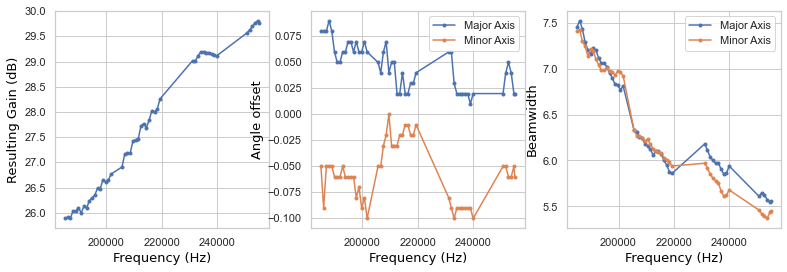

In [13]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

ax[0].plot(freq_200_combined, gain_200_combined, '.-')
ax[0].set_ylabel('Resulting Gain (dB)',axis_font)
ax[0].set_xlabel('Frequency (Hz)',axis_font)

ax[1].plot(freq_200_combined, mj_ao_200_combined, '.-', label='Major Axis')
ax[1].plot(freq_200_combined, mn_ao_200_combined, '.-', label='Minor Axis')
ax[1].set_ylabel('Angle offset',axis_font)
ax[1].set_xlabel('Frequency (Hz)',axis_font)
ax[1].legend()

ax[2].plot(freq_200_combined, mj_bw_200_combined, '.-', label='Major Axis')
ax[2].plot(freq_200_combined, mn_bw_200_combined, '.-', label='Minor Axis')
ax[2].set_ylabel('Beamwidth',axis_font)
ax[2].set_xlabel('Frequency (Hz)',axis_font)
ax[2].legend()

In [14]:
EKcal_200_combo_22 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_22mm_edit2.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
EKcal_200_combo_38 = pd.read_csv('F:/Nya-AZKABAN/Calibrations/200kHz/EK_200_TScal_combined_38mm_edit2.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

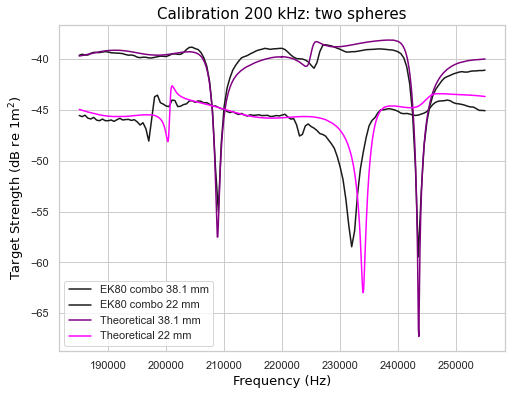

In [15]:
plt.figure(figsize=(8,6))
ax = plt.subplot(1,1,1)
# plot calibrations
plt.plot(EKcal_200_combo_38.freqs*1000, EKcal_200_combo_38.TS, 'k' , label='EK80 combo 38.1 mm')
plt.plot(EKcal_200_combo_22.freqs*1000, EKcal_200_combo_22.TS, 'k' , label='EK80 combo 22 mm')


# plot theoretic
plt.plot(freq_38, ts_38, 'purple' , label='Theoretical 38.1 mm')
plt.plot(freq_22, ts_22, 'magenta' , label='Theoretical 22 mm')
plt.title('Calibration 200 kHz: two spheres',title_font)
plt.ylabel('Target Strength (dB re 1m$^2$)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)
plt.legend()